![house Logo](https://www.imovelweb.com.br/noticias/wp-content/uploads/2013/08/venda2.jpg)

# House Sales in King County, USA


Este conjunto de dados contém preços de imóveis para o Condado de King, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction



In [1]:
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import warnings
import mlflow
import mlflow.sklearn


warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
sns.set(style="white")
%matplotlib inline 

## Dados

In [2]:
import pandas as pd

In [3]:
# Raw Data
df  = pd.read_csv('data/raw.csv', parse_dates=['date'], index_col=['id'])#.set_index('date')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 3.5 MB


In [5]:
# plot
df_plot = df.set_index('date').resample('W').count()['price'].reset_index()
trace1  = go.Scatter(x=df_plot.date, y=df_plot.price)
data    = [trace1]
layout = go.Layout(
    title='Total de casas vendidas por semana',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Total')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Problema


**Devemos criar um modelo para prever o preço do imóvel a partir de alguns dados, esse modelo será utilizado em um portal de classificados de imóveis**

![house Logo](https://i.imgur.com/Wf7316S.png)



## Preparação dos Dados

* Engenharia de Features
* Transformações 
* Limpeza dos dados

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 20)

In [8]:
df.sample(2).to_json(orient='split')

'{"columns":["date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],"index":[7424110130,6189200345],"data":[[1400112000000,423000.0,4,1.75,1880,7303,1.0,0,0,3,7,1010,870,1976,0,98034,47.7129,-122.203,1710,7200],[1408492800000,738950.0,4,2.75,2260,12005,1.0,0,0,4,8,2260,0,1956,1989,98005,47.6342,-122.171,1870,10800]]}'

In [9]:
#df['bedrooms_per_sqft_living'] = df.bedrooms/df.sqft_living

In [10]:
#....

In [11]:
# Save sample
df.drop(["date","price"], axis=1).sample(10)\
    .to_csv('data/predict_test.csv', index=False)

## Model Training

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Avaliação
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae  = mean_absolute_error(actual, pred)
    r2   = r2_score(actual, pred)
    return rmse, mae, r2

### Split Train/Test

In [13]:
# Save Dataset
df.to_csv('artefacts/dataset.csv', index=False)

# Features
X = df.drop(["date","price"], axis=1)

# Target
y = df['price']

# Split
X_train, X_test, \
     y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Features
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
2653000005,4,2.75,2600,2750,1.5,0,0,3,7,1620,980,1936,0,98119,47.6413,-122.357,1960,3705
1657310170,3,2.50,2140,9492,2.0,0,0,3,8,2140,0,1994,0,98092,47.3289,-122.204,2180,9184


In [15]:
# target
y_train.head(2)

id
2653000005    840000.0
1657310170    302000.0
Name: price, dtype: float64

### Build Model

In [16]:
from sklearn.linear_model import LinearRegression

# Define Model
params = {'fit_intercept': False, 'normalize': True, 'n_jobs': -1}

model  = LinearRegression(**params)

#train
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)

### Evaluation

In [17]:
# eval
pred_y = model.predict(X_test)

(rmse, mae, r2) = eval_metrics(y_test, pred_y)

print("RMSE: %s" % rmse)
print("MAE: %s" % mae)
print("R2: %s" % r2)

RMSE: 213147.47144982326
MAE: 126826.31741847585
R2: 0.6965776537293062


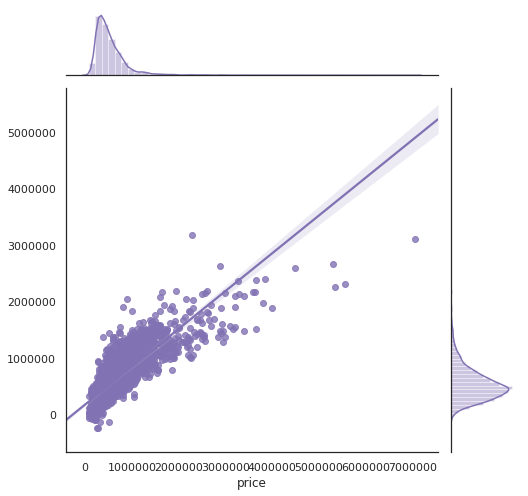

In [18]:
g = sns.jointplot(x=y_test, y=pred_y, kind="reg", color="m", height=7)
g.savefig('artefacts/img_res_0.png')

In [19]:
# traking

# log in ml FLow
with mlflow.start_run():
    
    # SAlva pasta de artefatos
    mlflow.log_artifacts("artefacts/")
    
    # Salva parametros
    for k, v in params.items():
        mlflow.log_param(k, v)
    
    # Salva métricas
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE",  mae)
    mlflow.log_metric("R2",   r2)
    
    # salva model
    mlflow.sklearn.log_model(model, "model")

### Build Model 2

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Define Model
params = {'n_estimators': 10, 
          'max_depth': 10, 
          'n_jobs': -1}

model  = RandomForestRegressor(**params)

In [21]:
#train
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluation

In [22]:
# eval
pred_y = model.predict(X_test)
(rmse, mae, r2) = eval_metrics(y_test, pred_y)

print("RMSE: %s" % rmse)
print("MAE: %s" % mae)
print("R2: %s" % r2)

RMSE: 162332.86544759764
MAE: 83678.89508429039
R2: 0.8240050923840927


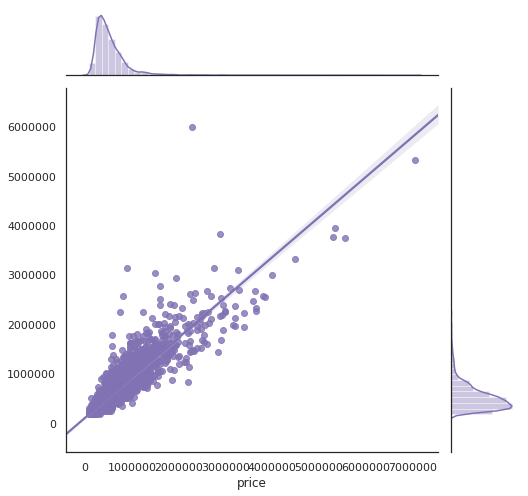

In [23]:
g = sns.jointplot(x=y_test, y=pred_y, kind="reg", color="m", height=7)
g.savefig('artefacts/img_res_0.png')

In [24]:
# tracking
with mlflow.start_run():
    
    mlflow.log_artifacts("artefacts/")
    
    for k, v in params.items():
        mlflow.log_param(k, v)
        
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE",  mae)
    mlflow.log_metric("R2",   r2)
    
    mlflow.sklearn.log_model(model, "model")

### Pipeline de ML

![image.png](https://i.imgur.com/Scx9nFd.png)

### Save Model

In [25]:
from sklearn.externals import joblib

In [26]:
# Save
joblib.dump(model, './artefacts/model.pkl')

['./artefacts/model.pkl']

In [27]:
# load
model = joblib.load('./artefacts/model.pkl')
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
sample = X_test.sample(1)
sample

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
5101408599,4,1.75,1470,5350,1.0,0,0,3,7,980,490,1955,0,98125,47.7048,-122.315,1970,6138


In [29]:
model.predict(sample)

array([474814.78433283])

## MLflow

![mlflow](https://databricks.com/wp-content/uploads/2018/06/mlflow.png)

https://mlflow.org/

### Teste Simples do Tracking

In [30]:
import mlflow
#mlflow.set_tracking_uri("http://34.73.179.244/")

# log in ml FLow
with mlflow.start_run():
    
    mlflow.log_artifacts("artefacts/")
    
    mlflow.log_param("param1", 0)
    
    mlflow.log_metric("RMSE", 0)
    mlflow.log_metric("MAE",  0)
    mlflow.log_metric("R2",   0)

## Keras

### Build Model - Keras

In [31]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

Using TensorFlow backend.


In [32]:
# Model
model = Sequential([
    Dense(100, input_shape=(X_train.shape[1],)),
    Activation('relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1900      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [33]:
# train
hist = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          batch_size=254, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 14480 samples, validate on 7133 samples
Epoch 1/10
14480/14480 [==============================] - 5s 370us/step - loss: 350746203988.0132 - val_loss: 328597431632.9309
Epoch 2/10
14480/14480 [==============================] - 1s 48us/step - loss: 254674409539.7834 - val_loss: 237015994496.0538
Epoch 3/10
14480/14480 [==============================] - 1s 49us/step - loss: 177761332429.6486 - val_loss: 175742946920.8692
Epoch 4/10
14480/14480 [==============================] - 1s 43us/step - loss: 135701954599.6022 - val_loss: 148128743534.2526
Epoch 5/10
14480/14480 [==============================] - 1s 62us/step - loss: 123138183731.5182 - val_loss: 142846287731.0259
Epoch 6/10
14480/14480 [==============================] - 1s 57us/step - loss: 119800649827.5713 - val_loss: 140434629236.2103
Epoch 7/10
14480/14480 [==============================] - 1s 67us/step - loss: 118049513756.5702 - val_loss: 138329329347.8850
Epoch 8/10
14

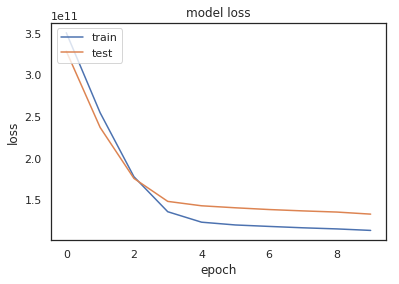

In [34]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return fig 

fig = plot_hist(hist)
fig.savefig('artefacts/train_hist.png')

 ### Evaluation

In [35]:
score = model.evaluate(X_test, y_test)

7133/7133 [==============================] - 1s 112us/step


In [36]:
# eval
pred_y = model.predict(X_test).reshape(-1)
(rmse, mae, r2) = eval_metrics(y_test, pred_y)

print("RMSE: %s" % rmse)
print("MAE: %s" % mae)
print("R2: %s" % r2)

RMSE: 364443.0193890421
MAE: 223997.6259463059
R2: 0.11295334112043276


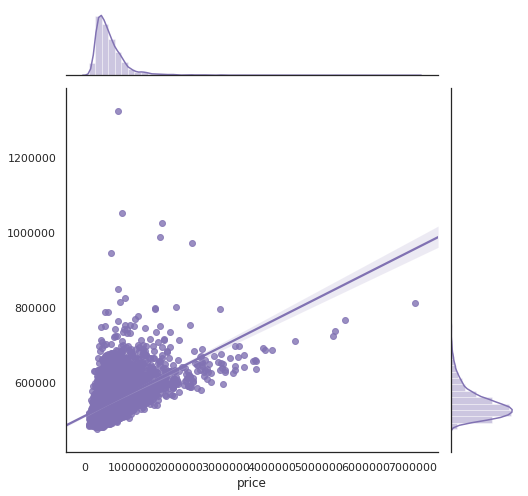

In [37]:
g = sns.jointplot(x=y_test, y=pred_y, kind="reg", color="m", height=7)
g.savefig('artefacts/img_res_0.png')

In [38]:
from mlflow import keras

# log in ml FLow
with mlflow.start_run():
    
    mlflow.log_artifacts("artefacts/")
    
    mlflow.log_param('layers', [32])
    
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE",  mae)
    mlflow.log_metric("R2",   r2)
    
    mlflow.keras.log_model(model, "model")    